In [1]:
import geopandas
from geopandas import read_file

In [2]:
import mapclassify
mapclassify.__version__

'2.2.0dev'

In [3]:
import libpysal
libpysal.__version__

'4.1.0'

In [4]:
pth = libpysal.examples.get_path('south.shp')

In [5]:
df = read_file(pth)

## New default legend formatting

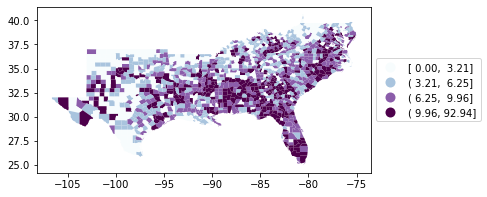

In [6]:
%matplotlib inline
ax = df.plot(column='HR60', scheme='QUANTILES', k=4, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

In [7]:
labels = [t.get_text() for t in ax.get_legend().get_texts()]
labels

['[ 0.00,  3.21]', '( 3.21,  6.25]', '( 6.25,  9.96]', '( 9.96, 92.94]']

In [8]:
q4 = mapclassify.Quantiles(df.HR60, k=4)
q4

Quantiles             

   Interval      Count
----------------------
[ 0.00,  3.21] |   353
( 3.21,  6.25] |   353
( 6.25,  9.96] |   353
( 9.96, 92.94] |   353

In [9]:
labels == q4.get_legend_classes()

True

Note that in this case, the first interval is closed on the minimum value in the dataset. The other intervals have an open lower bound. This is now displayed in the legend.

## Overriding numerical format

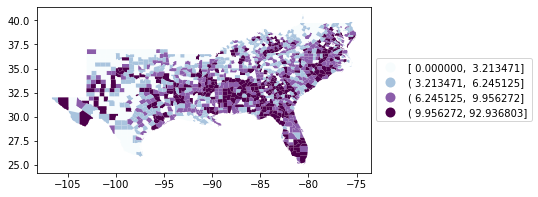

In [10]:
ax = df.plot(column='HR60', scheme='QUANTILES', k=4, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)},
            fmt="{:f}")

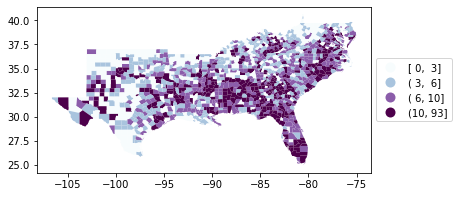

In [11]:
ax = df.plot(column='HR60', scheme='QUANTILES', k=4, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)},
            fmt="{:.0f}")

The new keyword arg `fmt` takes a string to set the numerical formatting.

## When first class lower bound < y.min()

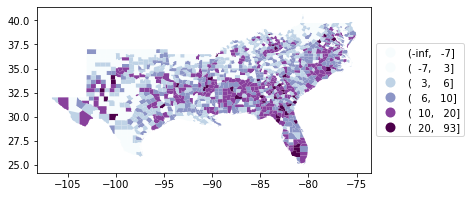

In [12]:
ax = df.plot(column='HR60', scheme='BoxPlot', \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)},
            fmt="{:.0f}")

In [13]:
bp = mapclassify.BoxPlot(df.HR60)
bp


BoxPlot               

   Interval      Count
----------------------
( -inf, -6.90] |     0
(-6.90,  3.21] |   353
( 3.21,  6.25] |   353
( 6.25,  9.96] |   353
( 9.96, 20.07] |   311
(20.07, 92.94] |    42

In [14]:
bp.get_legend_classes(fmt="{:.0f}")

['(-inf,   -7]',
 '(  -7,    3]',
 '(   3,    6]',
 '(   6,   10]',
 '(  10,   20]',
 '(  20,   93]']

In some classifiers the user should be aware that the lower (upper) bound of the first (last) interval is not equal to the minimum (maximum) of the attribute values. This is useful to detect extreme values and highly skewed distributions.